In [10]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

# Splitting the data into train and test

In [15]:
# Function to split image and mask into left and right halves
def split_image_and_mask(image, mask):
    height, width = image.shape[:2]
    half_width = width // 2
    left_image = image[:, :half_width, :]
    right_image = image[:, half_width:, :]
    left_mask = mask[:, :half_width]
    right_mask = mask[:, half_width:]
    return left_image, right_image, left_mask, right_mask

# Path to directory containing images and mask
data_dir = r"../data/Brain_Data_S1_modified"
label_dir = os.path.join(data_dir, "labels")
image_dir = os.path.join(data_dir, "images")

train_dir = r"../data/data_S1/train"
train_img_dir = os.path.join(train_dir, "images")
train_label_dir = os.path.join(train_dir, "labels")

test_dir = r"../data/data_S1/test"
test_img_dir = os.path.join(test_dir, "images")
test_label_dir = os.path.join(test_dir, "labels")

In [16]:
# Load mask (assuming it's the same for all images)
mask_path = os.path.join(label_dir, "mask_s1.png")
mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
# plt.imshow(mask, cmap='gray')
# plt.axis('off')

In [17]:
# Load and split each image into left and right halves
for i in range(7):
    image_path = os.path.join(image_dir, f"channel_{i}.jpg")
    image = cv2.imread(image_path)
    left_image, right_image, left_mask, right_mask = split_image_and_mask(image, mask)
    # Save left and right halves of images and masks
    cv2.imwrite(os.path.join(train_img_dir, f"train_channel_{i}.png"), left_image)
    cv2.imwrite(os.path.join(test_img_dir, f"test_channel_{i}.png"), right_image)
    cv2.imwrite(os.path.join(train_label_dir, f"train_mask_{i}.png"), left_mask)
    cv2.imwrite(os.path.join(test_label_dir, f"test_mask_{i}.png"), right_mask)

# Visualize the data

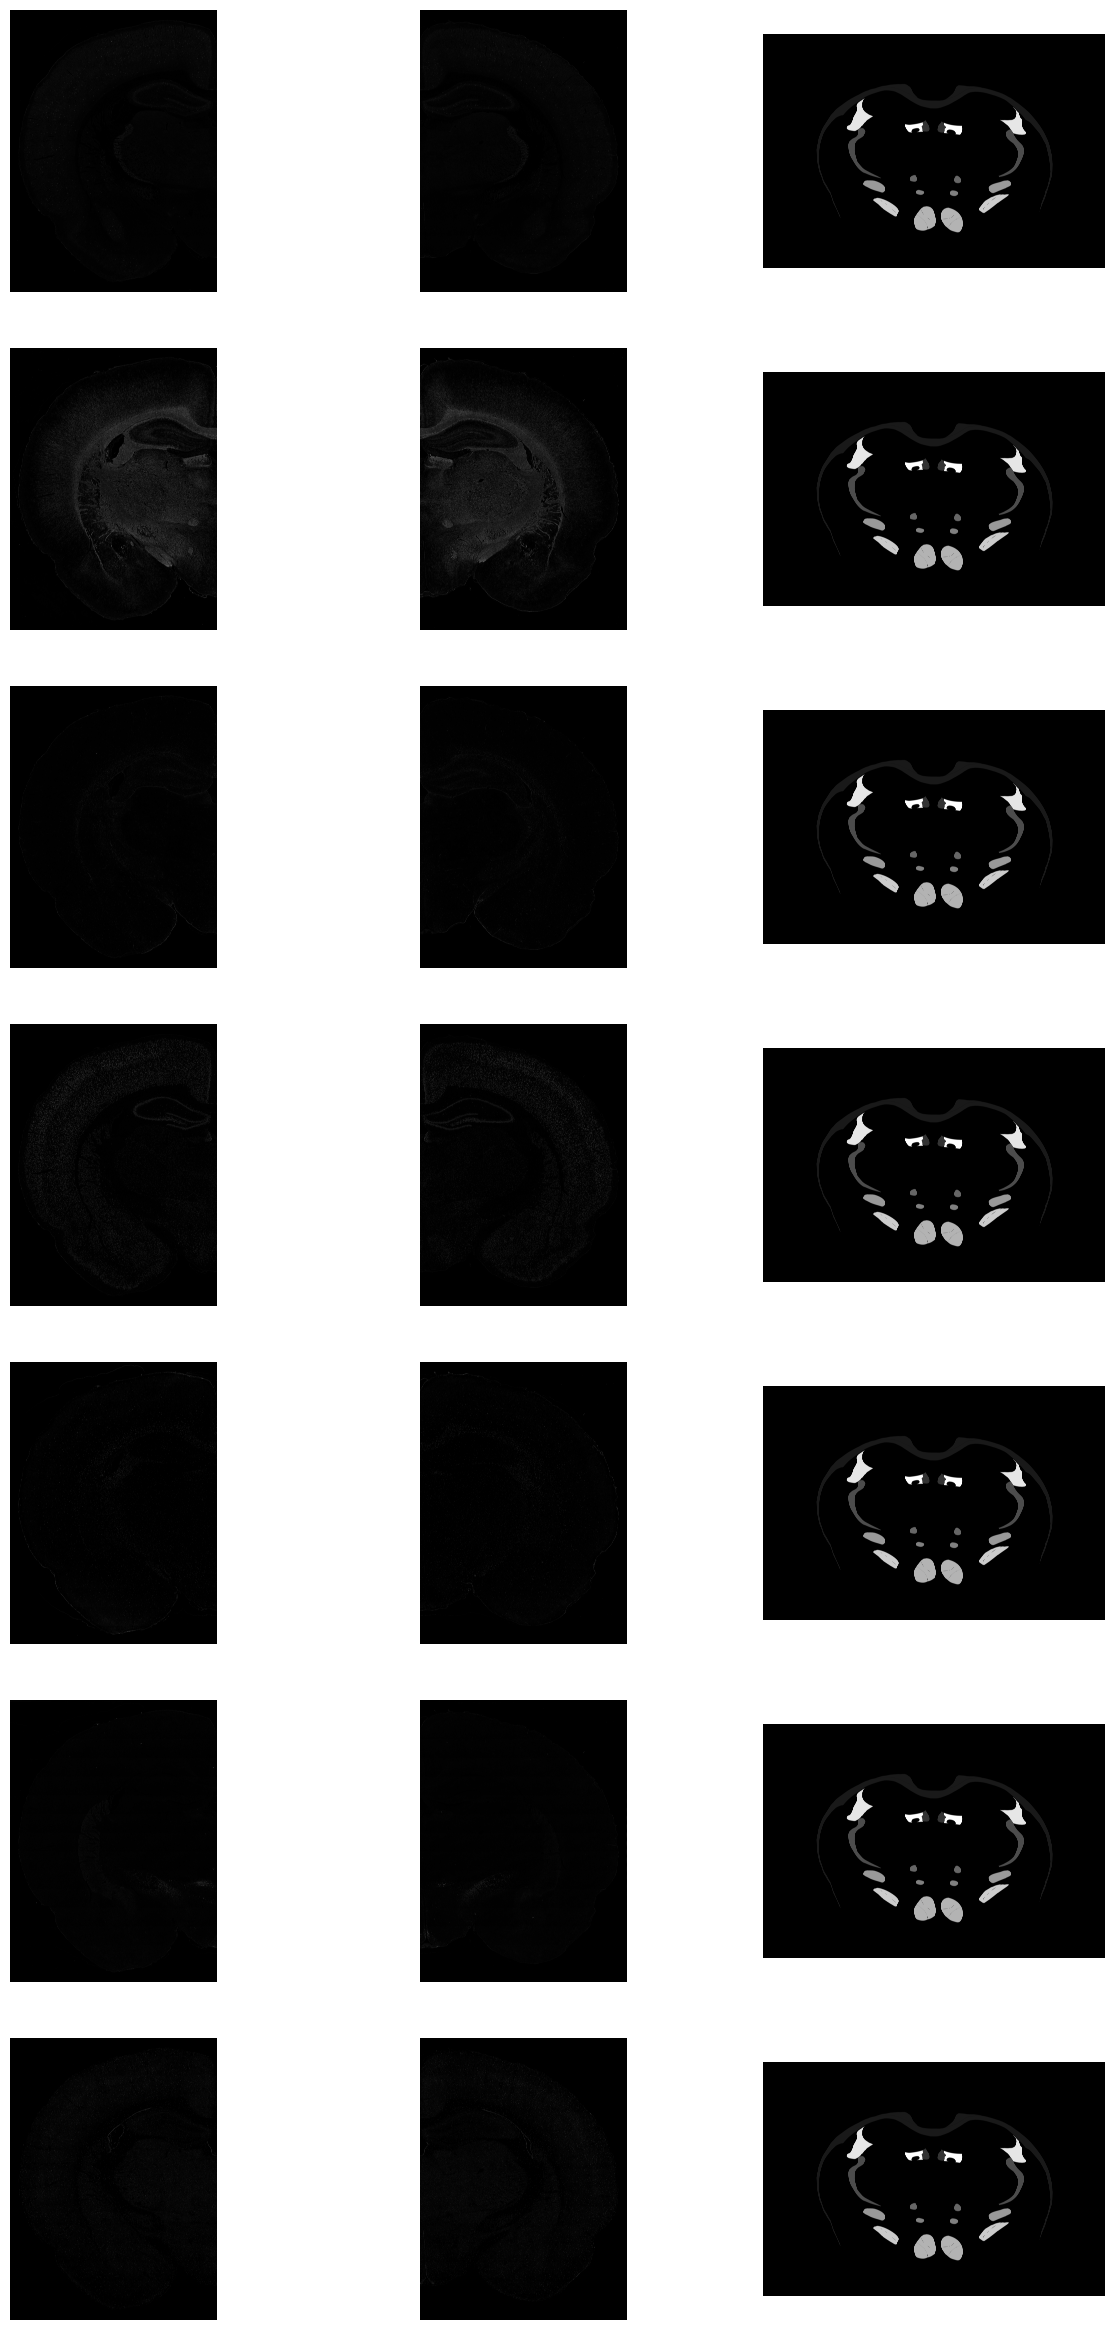

In [19]:
# visualize all the train images (1st column) corresponding test images (2nd column) and the complete mask (3rd column)
fig, axs = plt.subplots(7, 3, figsize=(15, 30))
for i in range(7):
    train_img = cv2.imread(os.path.join(train_img_dir, f"train_channel_{i}.png"))
    test_img = cv2.imread(os.path.join(test_img_dir, f"test_channel_{i}.png"))
    mask = cv2.imread(os.path.join(label_dir, f"mask_s1.png"), cv2.IMREAD_GRAYSCALE)
    axs[i, 0].imshow(cv2.cvtColor(train_img, cv2.COLOR_BGR2RGB))
    axs[i, 0].axis('off')
    axs[i, 1].imshow(cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB))
    axs[i, 1].axis('off')
    axs[i, 2].imshow(mask, cmap='gray')
    axs[i, 2].axis('off')